In [1]:
# dependecies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# filepath
path_1 = "Data/BicycleSales_2015-20211021_Cleaned.xlsx"
path_2 = "Data/BikeSpecs.xlsx"

# read data
sales_df = pd.read_excel(path_1)
specs_df = pd.read_excel(path_2)

In [3]:
# rename specs Object column to Material
specs1_df = specs_df.rename(columns={"Object":"Material"})

# merge specs into sales data frame
merged_df = pd.merge(sales_df, specs1_df, on="Material", how="left")

In [4]:
# reduce down to necessary columns
reduced_df = merged_df[["Material", "Sold-to pt", "Month", "Invoiced Quantity", 
                        "Product hierarchy.1", "Application_x", "Tire Size", "Ply Construction",
                        "Bead", "Color", "TPI - Threads per inch", "Compound", "Technology"
                       ]]

# rename columns
reduced_df = reduced_df.rename(columns={"Product hierarchy.1":"Product hierarchy",
                                        "Application_x":"Application"})

In [5]:
# split tire size by diameter (before x) and width (after x)
reduced_df[["Diameter", "Width"]] = reduced_df["Tire Size"].str.split("X", n=1, expand=True)

# splite Month into separate month and year components
reduced_df[["Month", "Year"]] = reduced_df["Month"].str.split("/", n=1, expand=True)

In [6]:
# create Date column with reordered Year/Date format
reduced_df["Date"] = reduced_df["Year"] + "/" + reduced_df["Month"]

In [7]:
# strip erroneous text from diameter and width
reduced_df["Diameter"] = reduced_df["Diameter"].str.replace(r'"','')
reduced_df["Width"] = reduced_df["Width"].str.replace(r'"','')

In [8]:
# Output to excel for review
# reduced_df.to_excel('Output/output.xlsx')

In [9]:
# split Technology into individual components (delimited by /) and return new columns for
# Protection (EXO, EXO+, MaxxShield, SilkWorm, SilkShield, DD, DH) and Tubeless Ready (TR)

In [10]:
# group by material create a time series for each material for invoiced quantity by month
# diameter_df = reduced_df.groupby(["Diameter"])[["Diameter", "Month", "Invoiced Quantity"]]
# month_df = reduced_df.groupby(["Month"])[["Month", "Invoiced Quantity"]]
date_df = reduced_df.groupby(["Date"], as_index = False)[["Date", "Invoiced Quantity"]].sum()                     
date_df

,Date,Invoiced Quantity
0,2015/01,7210
1,2015/02,11520
2,2015/03,12564
3,2015/04,12648
4,2015/05,19070
...,...,...
77,2021/06,29528
78,2021/07,25659
79,2021/08,27208
80,2021/09,11897


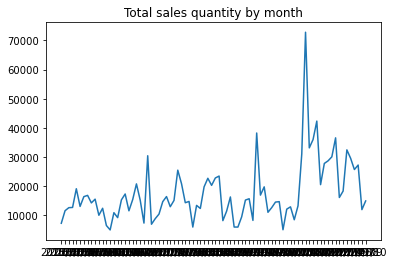

In [12]:
x_val = date_df["Date"]
y_val = date_df["Invoiced Quantity"]

plt.plot(x_val, y_val)
plt.title("Total sales quantity by month")

plt.show()

In [35]:
# group by year and month then sum invoiced quantity
year_month_df = reduced_df.groupby(["Year", "Month"],
                                   as_index = False)[["Year", "Month", "Invoiced Quantity"]].sum()
year_month_df

,Year,Month,Invoiced Quantity
0,2015,01,7210
1,2015,02,11520
2,2015,03,12564
3,2015,04,12648
4,2015,05,19070
...,...,...,...
77,2021,06,29528
78,2021,07,25659
79,2021,08,27208
80,2021,09,11897


In [21]:
years = year_month_df["Year"].unique()
months = {"Month": year_month_df["Month"].unique()}
yearly_df = pd.DataFrame(months)

x = 1

for each in years:
    df = year_month_df.loc[year_month_df['Year'] == each]
    df = df[["Month","Invoiced Quantity"]]
    df2 = df.rename(columns={"Invoiced Quantity" : each})
    yearly_df = pd.merge(yearly_df, df2, on="Month", how="left" )      

yearly_df

,Month,2015,2016,2017,2018,2019,2020,2021
0,01,7210,6443,6883,13355,9405,12064,30030.0
1,02,11520,4928,8792,12299,15180,12851,36552.0
2,03,12564,10845,10363,19711,15632,8419,16061.0
3,04,12648,9149,14637,22658,8198,13211,18269.0
4,05,19070,15252,16388,20236,38211,31050,32422.0
5,06,12998,17268,12897,22771,16883,72818,29528.0
6,07,16351,11494,15073,23427,19719,33108,25659.0
7,08,16791,15339,25451,8115,10980,35952,27208.0
8,09,14204,20735,20776,11380,12589,42304,11897.0
9,10,15497,15161,14271,16247,14486,20475,14875.0


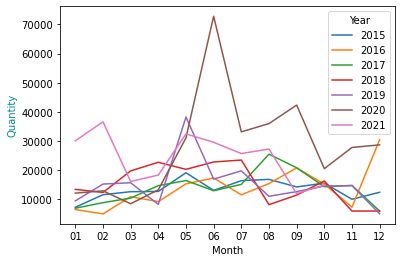

In [34]:
for each in years:
    plt.plot(yearly_df["Month"], yearly_df[each], label = each)

plt.xlabel("Month")
plt.ylabel("Quantity",color = "darkcyan")
plt.legend(title="Year")
plt.show()